In questo file vado ad analizzare tramite PCA la dimensionalità del dataset _semeion.csv_ per andae a trovare il numero ottimale di cluster.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import time as time
from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture

In [3]:
# load data
df = pd.read_csv('semeion.csv', sep=' ', usecols=range(0, 256), names=range(0, 256))
df.head()
df.shape

(1593, 256)

In [4]:
# standardizzo i dati ad aver una media di zero e varianza 1
X_std = StandardScaler().fit_transform(df)

In [27]:
# e creo una istanza PCA

pca = PCA(20)
principal_component = pca.fit_transform(X_std)
print(pca.n_components_)

20


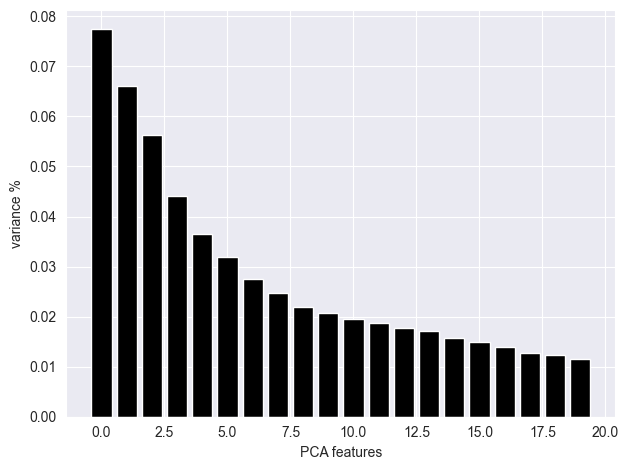

In [29]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.tight_layout()
# plt.xticks(features)
plt.savefig("images/pcaReduction.png")

/var/folders/t0/h2qbh8_90m34ly3lytn0q_tw0000gn/T/ipykernel_21838/2135438432.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[j // 5, j % 5].scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')
/var/folders/t0/h2qbh8_90m34ly3lytn0q_tw0000gn/T/ipykernel_21838/2135438432.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[j // 5, j % 5].scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')
/var/folders/t0/h2qbh8_90m34ly3lytn0q_tw0000gn/T/ipykernel_21838/2135438432.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[j // 5, j % 5].scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')
/var/folders/t0/h2qbh8_90m34ly3lytn0q_tw0000gn/T/ipykernel_21838/2135438432.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[j // 5, j % 5].scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')
/var/folders/t0/h2qbh8_90m34ly3l

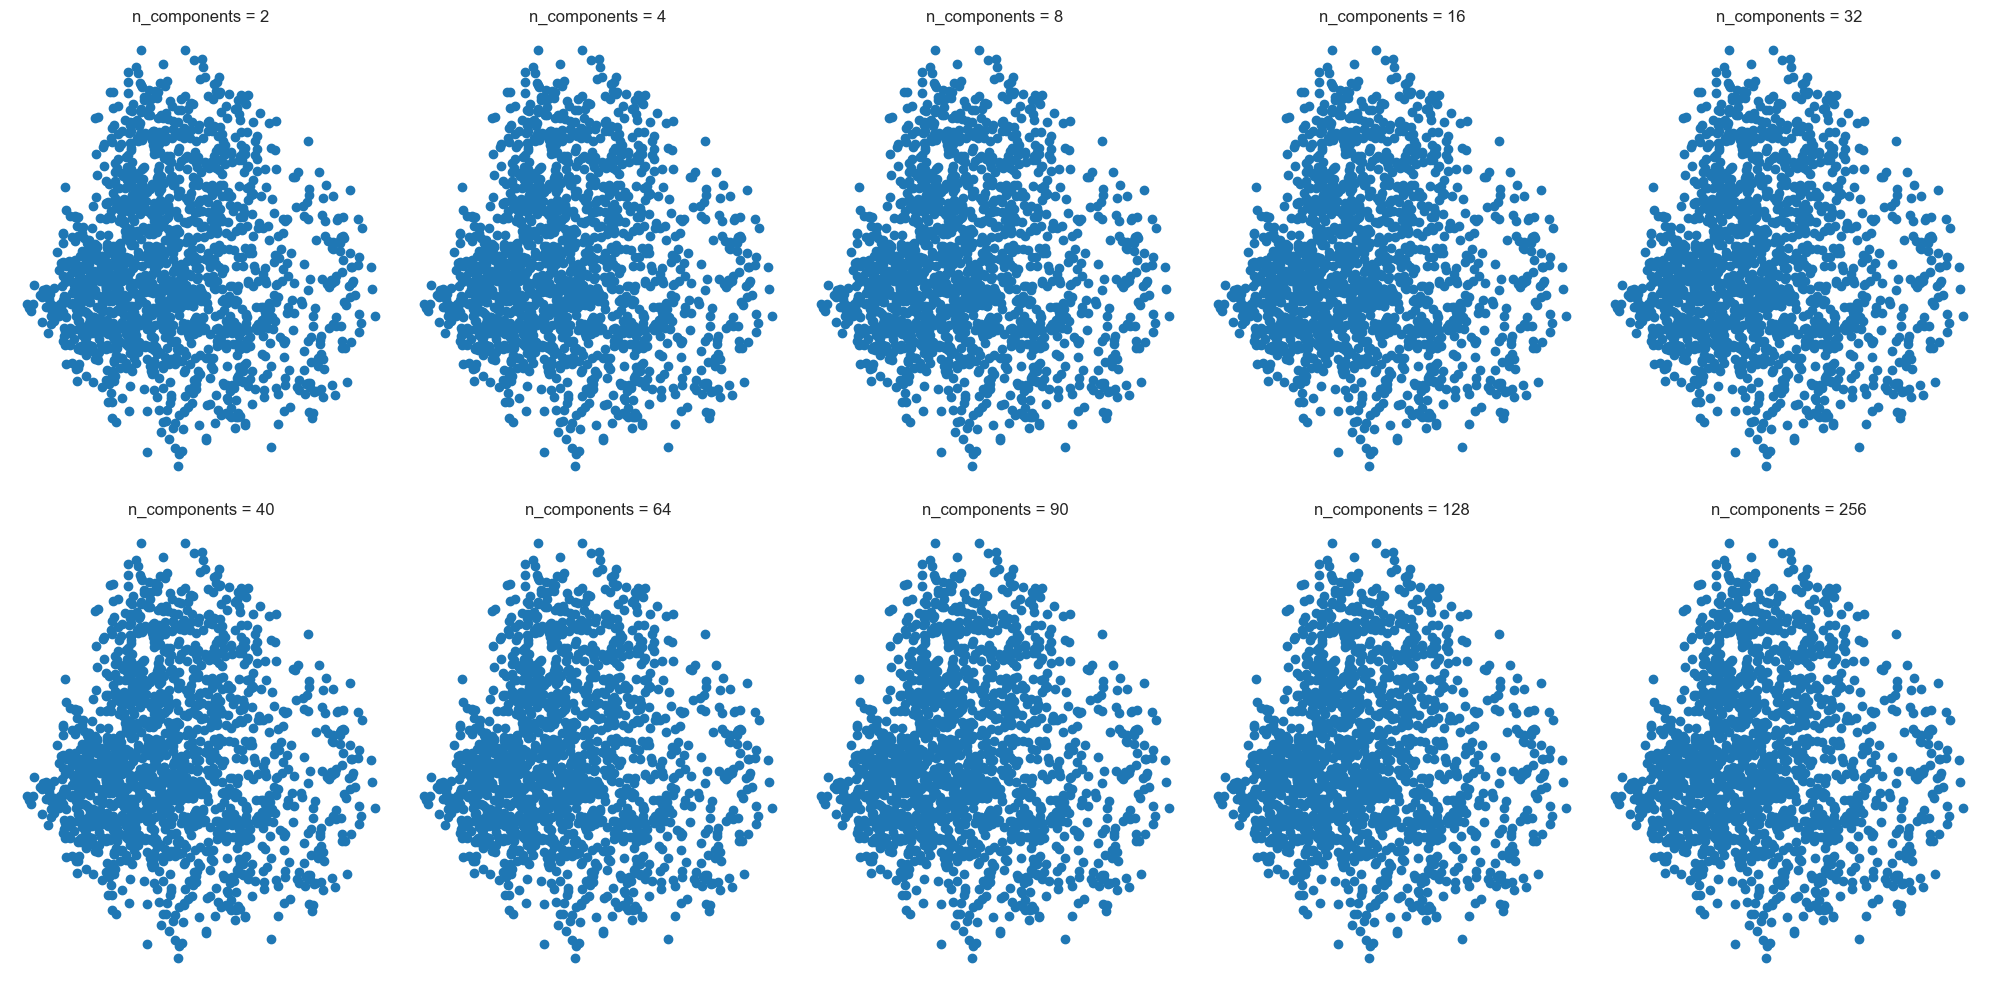

In [20]:
n_pca = [2, 4, 8, 16, 32, 40, 64, 90, 128, 256]
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

for j in range(10):
    pca = PCA(n_components=14)
    X_pca = pca.fit_transform(X_std)
    ax[j // 5, j % 5].scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')
    ax[j // 5, j % 5].set_title('n_components = {}'.format(n_pca[j]))
    ax[j // 5, j % 5].set_xlabel('n_components')
    ax[j // 5, j % 5].axis('off')

plt.tight_layout()
plt.show()

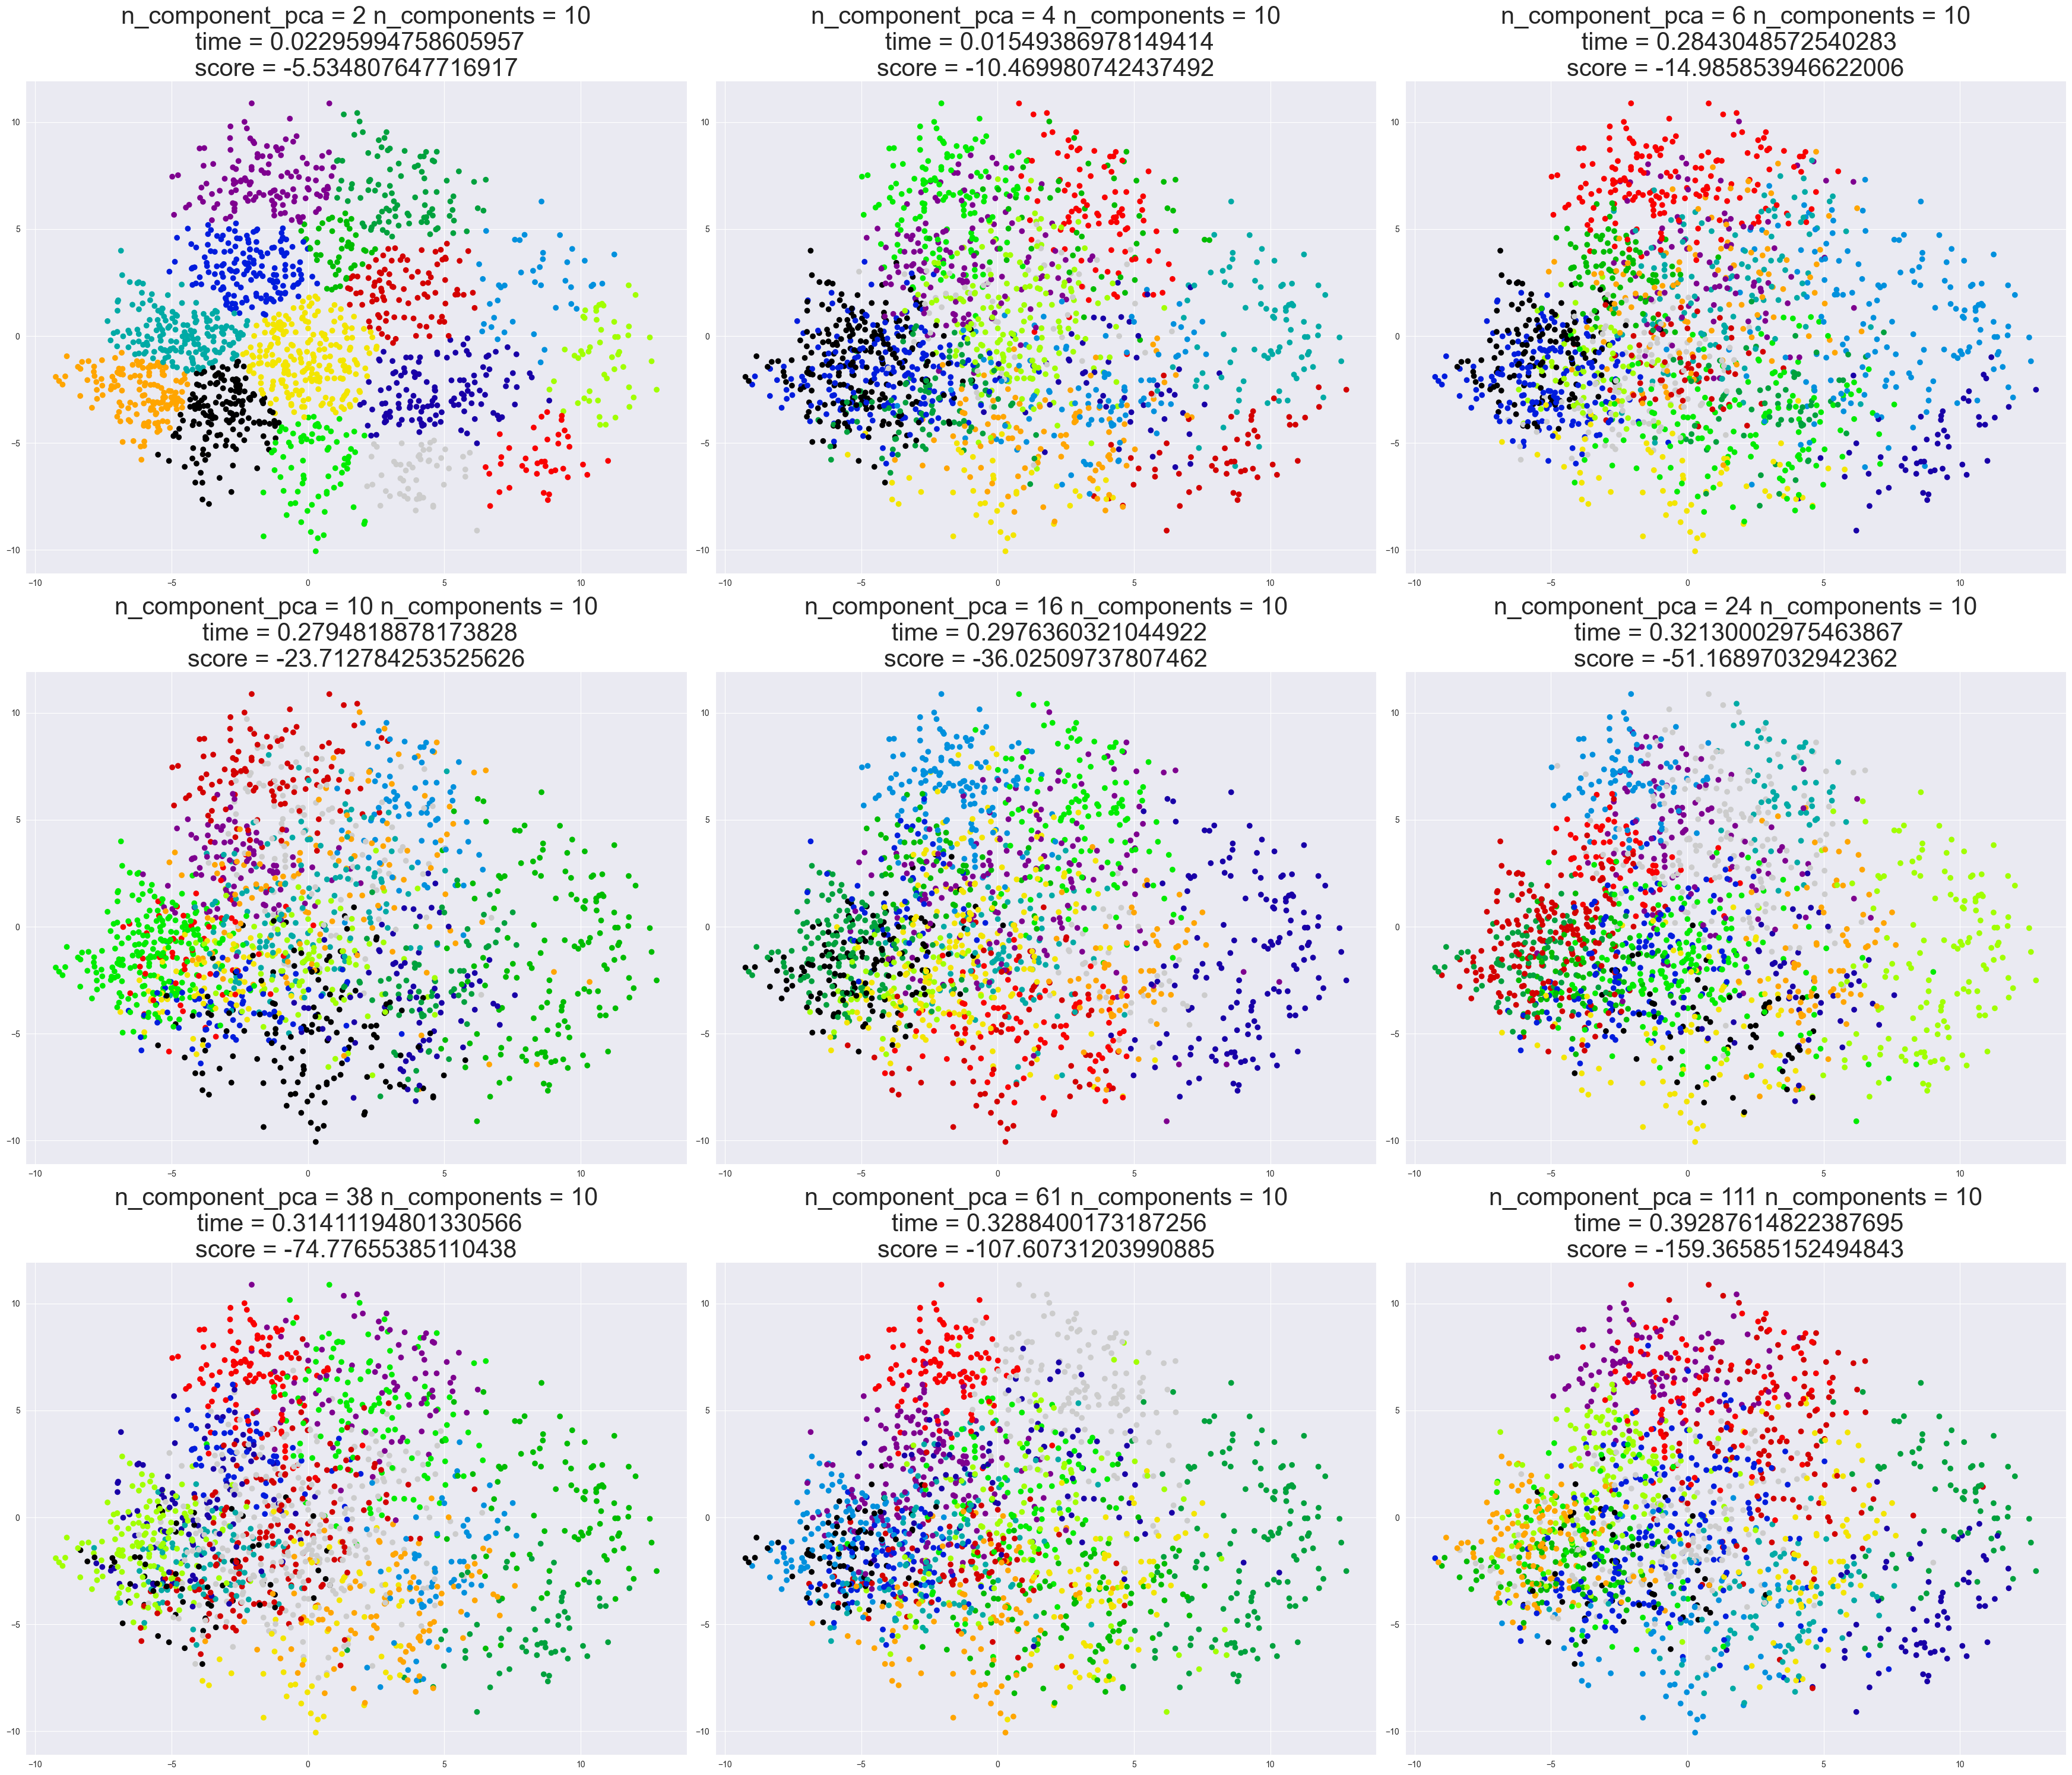

In [21]:
percent_pca = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
fig, ax = plt.subplots(3, 3, figsize=(35, 30))
for i in range(len(percent_pca)):
    pca = PCA(percent_pca[i])
    X_pca = pca.fit_transform(X_std)
    start = time.time()
    bgm = GaussianMixture(n_components=15, covariance_type='diag', max_iter=1000, random_state=0)
    bgm.fit(X_pca)
    ax[i // 3, i % 3].scatter(X_pca[:, 0], X_pca[:, 1], c=bgm.predict(X_pca), cmap='nipy_spectral')
    ax[i // 3, i % 3].set_title(
        'n_component_pca = ' + str(pca.n_components_) + ' n_components = ' + str(10) +
        '\n time = ' + str(time.time() - start) + '\n' + 'score = ' + str(bgm.score(X_pca)), fontsize=30)

plt.tight_layout()
plt.show()

In [ ]:
…